<a href="https://colab.research.google.com/github/Dileepsaie/LinearRegression/blob/main/Fish_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Code to mount Google Drive




In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## 2. Importing necessary libraries for computing

In [2]:
import numpy as np                # mathematical calculations
import pandas as pd               # manipulation of raw data 
import matplotlib.pyplot as plt   # plotting graphs
%matplotlib inline                

## 3. Pandas to import the data

In [3]:
path = '/content/Fish.csv'

In [4]:
raw_data = pd.read_csv(path)

In [5]:
raw_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
raw_data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


## 4. Ecoding the text categorical data

In [7]:
from sklearn.preprocessing import LabelEncoder
# area,sale_cond etc are character so convert it to numbers 

Species_labelencoder = LabelEncoder()
raw_data["Species"] = Species_labelencoder.fit_transform(raw_data["Species"])

## 5. Feature Scaling

In [8]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())

In [9]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,-0.377358,-0.094743,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,-0.377358,-0.065652,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,-0.377358,-0.035349,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,-0.377358,-0.021410,0.001026,0.010623,0.038395,0.218184,0.005358
4,-0.377358,0.019196,0.004909,0.010623,0.046840,0.201584,0.100997


In [10]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,0.455975,-0.234016,-0.286353,-0.294831,-0.301133,-0.399370,-0.426236
155,0.455975,-0.233289,-0.282469,-0.291195,-0.299443,-0.379659,-0.443799
156,0.455975,-0.234016,-0.274702,-0.280286,-0.294376,-0.388540,-0.445659
157,0.455975,-0.229471,-0.253343,-0.256650,-0.270727,-0.353958,-0.331287
158,0.455975,-0.229349,-0.241693,-0.243922,-0.253835,-0.350510,-0.357787


## 6. Seperate X and Y from data

In [11]:
X = data.drop(columns = ["Weight"])   
y= data.iloc[:, 1:2]           # y = data["Weight"]   
print(y)

       Weight
0   -0.094743
1   -0.065652
2   -0.035349
3   -0.021410
4    0.019196
..        ...
154 -0.234016
155 -0.233289
156 -0.234016
157 -0.229471
158 -0.229349

[159 rows x 1 columns]


## 7. Inserting Bias term

In [12]:
X.insert(0,'Bias',1)
X.head()

,Bias,Species,Length1,Length2,Length3,Height,Width
0,1,-0.377358,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,1,-0.377358,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,1,-0.377358,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,1,-0.377358,0.001026,0.010623,0.038395,0.218184,0.005358
4,1,-0.377358,0.004909,0.010623,0.046840,0.201584,0.100997


In [13]:
X.head()

,Bias,Species,Length1,Length2,Length3,Height,Width
0,1,-0.377358,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,1,-0.377358,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,1,-0.377358,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,1,-0.377358,0.001026,0.010623,0.038395,0.218184,0.005358
4,1,-0.377358,0.004909,0.010623,0.046840,0.201584,0.100997


In [14]:
X.shape, y.shape

((159, 7), (159, 1))

## 8. Splitting the data into the training and testing data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
X_train = np.matrix(X_train)
y_train = np.matrix(y_train)

In [17]:
theta = np.matrix(np.zeros(7)) #initial value of theta , there are  thetas

In [18]:
theta.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1, 7), (119, 7), (119, 1), (40, 7), (40, 1))

## 9. Defining Error and Gradient Descent function

In [19]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [20]:
computeError(X_train,y_train,theta)

0.02494305468280262

In [21]:
learn_rate = 0.001
iters = 50000
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))   # creating a temporary matrix to update the values of theta
  parameters = theta.shape[1]         # finding the number of parameters
  cost = []            # creating a list to track the cost at all iters

  for i in range(iters):      #for each iteration
    error = (x*theta.T)-y     #error

    for j in range(parameters): #update the value of theta
      gradient = np.multiply(error,x[:,j])
      temp[0,j]= theta[0,j] - ((learn_rate/len(x))*np.sum(gradient))      #assign it to the temp matrix

    theta= temp   #simultaneously update the values of all the theta values
    
    cost_iter = computeError(x,y,theta) #find the cost for the iteration

    cost.append(cost_iter) 
    
  return theta,cost

In [22]:
new_theta,cost = gradientDescent(X_train,y_train,theta,learn_rate,iters)

## 10. Plot between cost and number of iterations

Text(0.5, 1.0, 'Error Vs Iterations')

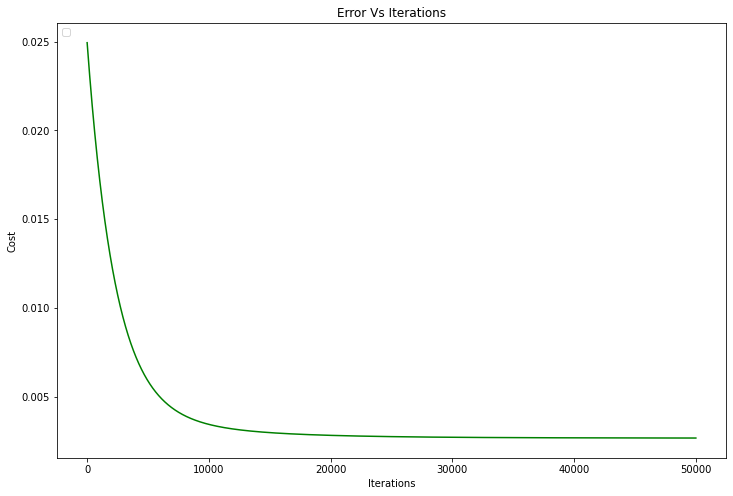

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'g')
ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

## 11. Predicting - Training Data

In [24]:
  Train_model_price = X_train * new_theta.T # predicting training data

## 12. Predicting - Test Data

In [33]:
x_test=np.matrix(X_test)
y_test=np.matrix(y_test)
Test_model_price = x_test * new_theta.T # predicting training data

## 13. Computation of error and Accuracy - Training Error

In [34]:
from sklearn.metrics import mean_absolute_error

Train_Error = mean_absolute_error(Train_model_price,y_train)
Train_Accuracy = 1 - Train_Error

print('Train Error = {} %'.format((round(Train_Error*100,2))))
print('Train Accuracy = {} %'.format((round(Train_Accuracy*100,2))))

Train Error = 5.64 %
Train Accuracy = 94.36 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


## 14. Computation of error and Accuracy - Test Error

In [35]:
from sklearn.metrics import mean_absolute_error

Test_Error = mean_absolute_error(Test_model_price,y_test)
Test_Accuracy = 1 - Test_Error

print('Test Error = {} %'.format((round(Test_Error*100,2))))
print('Test Accuracy = {} %'.format((round(Test_Accuracy*100,2))))

Test Error = 5.56 %
Test Accuracy = 94.44 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
